# Intitial Setup

## LLama 3.1 8B

In [ ]:
%%capture
%pip install accelerate bitsandbytes -q
!pip install -Uq transformers

##Restart runtime after this cell

In [ ]:
from main import *
from config import current_possible_intents as intents, MOBILE_MODEL_PTH, MOBILE_TOKENIZER_PTH, Mobile_competitor_dict_pth, Mobile_intent_dict_pth_and_sheet_info
from intent_utils import *
from pro_con_sa import *
from subdomain_analysis_funcs import *
from subdomain_analysis_funcs import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

base_path='/content/drive/MyDrive/Sentiment_Analysis_Roberta/'
base_intent_path='/content/drive/MyDrive/Intent_Analysis/'

In [ ]:
from pathlib import Path
path = Path('/content/drive/Shareddrives/sentence_genration')

In [ ]:
##LLama 3.1 8B
%%capture
# Installs Unsloth, Xformers (Flash Attention) and all other packages!
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --no-deps "xformers<0.0.27" "trl<0.9.0" peft accelerate bitsandbytes
!pip install -Uq transformers
!pip install datasets


## RoBERTa

In [ ]:
import time

# Get the current time struct
current_time = time.localtime()

# Extract date and short month name
date = time.strftime("%d", current_time)
short_month = time.strftime("%b", current_time)

print(date)
print(short_month)

In [ ]:
from pathlib import Path
path = Path('/content/drive/Shareddrives/sentence_genration')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

base_path='/content/drive/MyDrive/Sentiment_Analysis_Roberta/'
base_intent_path='/content/drive/MyDrive/Intent_Analysis/'

Mounted at /content/drive


In [ ]:
import sys
# adding utils to the system path
sys.path.insert(0, base_path+'SA_utils')
sys.path.insert(0, base_intent_path+'intent_utils')

In [ ]:
%%capture
!pip install transformers
!pip install cloud-tpu-client
!pip install torch-xla==1.12

In [ ]:
from finetune_roberta import *
from intent_utils import *
from competitor_analysis import *
from main import *
import matplotlib.pyplot as plt

In [ ]:
from datetime import datetime
import os

current_date = datetime.now()
day = str(current_date.day)
short_month_name = current_date.strftime("%b")

# pre-process the database


## Load data

In [ ]:
df_prim=pd.read_excel(base_path+'Datasets/R4T_db_primary_cleaned_23_Jan.xlsx')  ##R4T: ready for training

In [ ]:
df_prim

,UID,Model Name,Brand,Source,Country,Rating,Review Date,Seeded Review,Review Text,Price,Build and Design,Screen,Camera,Battery,Performance_Processor,Software,NETWORKING,Other_Specs
0,10779,iPhone 14 Pro,Apple,T-mobile,USA,5,2022-09-09,0,The cameras are incredible. Great battery life...,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
1,10780,iPhone 14 Pro,Apple,T-mobile,USA,5,2022-09-09,0,It�۪s a really good phone with h a nice purple...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10808,iPhone 14 Pro,Apple,Verizon,USA,5,2022-09-10,0,Great phone with great camera,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10809,iPhone 14 Pro,Apple,Verizon,USA,5,2022-09-10,0,Not as big of an upgrade from the 12 to the 13...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,10810,iPhone 14 Pro,Apple,Verizon,USA,5,2022-09-10,0,Amazing iPhone I ever used thank you apple for...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,60521,Galaxy Z Fold 4,Samsung,Elkjop,Norway,5,2022-10-04,0,This is SO close to being the perfect phone.\n...,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
9122,60522,Galaxy Z Fold 4,Samsung,Elkjop,Norway,4,2022-08-04,0,This is really a good mobile. I think the fron...,-1.0,-1.0,-1.0,NaN,NaN,NaN,1.0,NaN,NaN
9123,60523,Galaxy Z Fold 4,Samsung,Elkjop,Norway,5,2022-08-04,0,Very fast and easy to use. The smaller screen ...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN
9124,60524,Galaxy Z Fold 4,Samsung,Elkjop,Norway,5,2022-08-04,0,"If you can afford it, you should consider tryi...",1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0


## Seperating Comps

In [ ]:
model_dict, company_dict = load_comparative_dict(base_intent_path+'Intent_Dictionaries/Compare_dict.xlsx')

In [ ]:
combine_dict_df=pd.read_excel(base_intent_path+'Intent_Dictionaries/Compare_dict.xlsx', sheet_name='Combined')
model_dict={}
company_dict={}
for i in combine_dict_df:
    brand_re=[]
    for item in combine_dict_df[i].dropna().tolist():
      model_name, model_re = item.strip().split('<<>>')
      model_dict[model_name]=[model_re]
      brand_re.append(model_re)
    company_dict[i]=brand_re

Google Pixel <insert>a<<>>\bpixel ?-?\d ?-?a\b|\bp-? ?\d-? ?a\b|\b\da\b
Google Pixel <insert><<>>\bpixel ?-?\d\b(?! pro)|\bp ?-?\d\b(?! pro)
Google Pixel <insert> Pro<<>>\bpixel ?-?\d ?-?pro\b|\bp ?-?\d ?-?pro\b
Google Nexus<<>>Nexus
Google Pixel Fold<<>>\b(?:pixel|google) ?-?fold\b
Google_General<<>>(?:pixels?\b|google)(?!.*\b\da\b|.*\b\d\b|.*\bfold\b).{1,15}(?:\bphones?\b|\bxl\b|\bmobiles?\b|exclusive\b|\bfeatures?\b|\bitems\b|\bone\b|\bonly \bfeatures\b|users?\b|models?|devices?\b|experiences?\b|series\b|products?\b)|\bseries pixel\b|\bgoogle\s*pixels?\b(?! \b\d[a-zA-Z]?\b)
Samsung Z series<<>>z[\s]*series\b|\bz\d?\d
Samsung Flip<<>>(?<!iphone )(?<!pixel )flip
Samsung Fold<<>>\b(?:samsung|galaxy) ?-?z? ?-?fold\b
Samsung A series<<>>a[\s]*series\b|\ba\d?\d
Samsung S series<<>>s[\s]*series\b
Samsung F series<<>>f[\s]*series\b|\bf ?\d?\d
Samsung M series<<>>(?<!titan )m[\s]*series\b|(?<!titan )\bm ?\d?\d
Samsung Galaxy S<insert> Plus<<>>\bS\s?\d{1,2} ?\+|\bS ?-?\d{1,2} ?-?plus\b
Samsun

In [ ]:
def brand_recognizer(model, company_dict):
  current_brand=None
  for i in company_dict:
    for j in company_dict[i]:
      if re.search(j, model, re.IGNORECASE):
        current_brand=i
        break
    if current_brand!=None:
      break
  return pd.Series({'Company':current_brand})

In [ ]:

def competetitors_splitter(og_df, word_dict:dict, company_dict, text_column='Review Text', ID_column='UID', model_col='Model Name'):
    """
    This function is used to split the sentences in the given dataframe and find the competitor mentioned in the sentence.
    Args:
        og_df (pd.DataFrame): Dataframe to be used for analysis
        word_dict (dict): Dictionary containing the keywords for each intent
        company_dict (dict): Dictionary containing the keywords for overall brand
        text_column (str, optional): Name of the column where the text is present. Defaults to 'Review Text'.
        ID_column (str, optional): Name of the column where the unique ID is present. Defaults to 'UID'.
        model_col (str, optional): Name of the column where the model name is present. Defaults to 'Model Name'.
    Returns:
        pd.DataFrame: Dataframe containing the splitted sentences and the competitor mentioned in the sentence.
    """

    og_df=og_df[[ID_column, text_column, model_col]].dropna(how='any').reset_index(drop=True)
    sentences = og_df[text_column].to_list()
    df = pd.DataFrame(columns=['UID', 'Split_ID', model_col, 'Split', 'Splitted_at', 'competitor_mentioned', 'competitor_word', 'regex_word'])
    current_row = 0
    current_col = 1
    for sentence in sentences:
        #split the sentence
        last_intent=''
        parts, separating_words = split_sentence(sentence, separators=['\n', '.','<<TB4>>'], stopwords=None)
        for part, sep_word in zip(parts, separating_words):
            matching_words=[]
            intents=[]
            keywdsfnd=[]
            model_name = og_df.iloc[current_row][model_col]

            if part==' ' or part=='':
                df.loc[len(df)-1, 'Splitted_at']=repr(sep_word)
                continue
            current_brand_name = brand_recognizer(model_name, company_dict)['Company']

            #iterating every word
            for intent_name in word_dict:
              for item in word_dict[intent_name]:
                #searching the model from text
                if item[:3]==r'^(?':
                  a = re.findall(item , part, re.IGNORECASE)
                  model_name_found=re.match(item, model_name, re.IGNORECASE)

                else:
                  a = re.findall(r'\b'+item+r'\b',part, re.IGNORECASE)
                  model_name_found=re.match(item, model_name, re.IGNORECASE)
                if a!=[] or a!=['']:
                  #if present
                  if model_name_found:
                    if '<insert>' in intent_name:
                      integer=[int(match.group()) for match in re.finditer(r'\d+', model_name)]
                      true_model_name = intent_name.replace('<insert>', str(integer[0]))

                    else:
                      true_model_name=model_name

                  #findall gives a list of found words using the given regex so we loop through them
                  for variant in a:
                    if '<insert>' in intent_name:
                      integer=[int(match.group()) for match in re.finditer(r'\d+', variant)]
                      true_name = intent_name.replace('<insert>', str(integer[0]))
                    else:
                      true_name = intent_name
                    #if it is same as our model
                    if (model_name_found) and (true_name == true_model_name):
                      intents.append('Our Model')
                      last_intent = 'Our Model'

                    else:
                      if true_name==f'{current_brand_name}_General':
                        true_name='Parent_Company_General'
                        intents.append(true_name)
                        last_intent=true_name
                      else:
                        intents.append(true_name)
                        last_intent=true_name

                    matching_words.append(variant)
                    keywdsfnd.append(item)

            intents=list(set(intents))

            if intents==[] and last_intent!='' and part!='[This review was collected as part of a promotion':
              mat=re.match(r"\bthis\b|\bit\b|\bit's\b", part, re.IGNORECASE)
              if mat and last_intent!='Our Model':
                intents = [last_intent]
                matching_words+=[mat.group()]
                current_col-=1
              else:
                last_intent=''
            #Adding the row
            df.loc[len(df)] = [og_df.iloc[current_row][ID_column], current_col, model_name, part, repr(sep_word), intents or ['Our Model'], matching_words,keywdsfnd]
            current_col += 1
        current_row += 1
        current_col = 1
    return df

In [ ]:
temp = competetitors_splitter(df_prim, model_dict, company_dict)

In [ ]:
temp2 = temp.groupby(['UID', 'Split_ID'], group_keys=False).apply(merge_ambigious_sentences).reset_index(drop=True)

In [ ]:
temp2.to_excel(base_path+f"Temporary_files/db_comp_splitted_{day}_{short_month_name}.xlsx", index=False)

In [ ]:
file1 = temp2[temp2['competitor_mentioned'].apply(lambda x: ['Our Model'] == x)]

In [ ]:
file2=temp2[~(temp2['competitor_mentioned'].apply(lambda x: ['Our Model'] == x))]

In [ ]:
temp_file = file1.groupby('UID', group_keys=False).apply(merge_sentences).reset_index(drop=True)

## Intent classification

In [ ]:
intent_dict, spw = load_intent_dict(base_intent_path+'Intent_Dictionaries/Mobile_Intent_dict.xlsx')

In [ ]:
final_df = create_final_dataframe(temp_file, intent_dict, spw)

In [ ]:
final_df = join_at_stopwords(final_df)

In [ ]:
final_df.to_excel(base_path+f"Temporary_files/db_intent_dataframe_{day}_{short_month_name}.xlsx", index=False)

## division by intent


In [ ]:
df=pd.read_excel(base_path+f"Temporary_files/db_intent_dataframe_{day}_{short_month_name}.xlsx")

In [ ]:
import ast
df['Intent'] = df['Intent'].apply(ast.literal_eval)

In [ ]:
df['Intent_words'] = df['Intent_words'].apply(ast.literal_eval)
df.fillna('', inplace=True)

In [ ]:
##VERY SPECIFIC
intents=['Price', 'Build and Design', 'Screen', 'Camera',	'Battery',	'Performance_Processor',	'Software',	'NETWORKING',	'Other_Specs']

In [ ]:
df_prim.sort_values('UID',inplace=True)

In [ ]:
seperated_dfs=merge_like_sentences_without_senti(df, intents, df_prim)

In [ ]:
seperated_dfs['Camera']

,UID,Review Text,Camera
0,10779,The cameras are incredible .,1.0
1,10808,Great phone with great camera,1.0
2,10815,Only upgrade if you are in need of a better ca...,1.0
3,10824,We took a lot of pictures and the quality was ...,1.0
4,10891,Amazing video/picture quality .,1.0
...,...,...,...
3230,60161,"In most situations , the photo quality is bett...",1.0
3231,60433,Can't upload photo since I'm using the phone f...,NaN
3232,60473,"It's like having two devices , a mobile phone ...",1.0
3233,60521,The image quality on both screens is really go...,1.0


In [ ]:
nan_dfs={}
for key in seperated_dfs.keys():
    nan_dfs[key]=seperated_dfs[key][seperated_dfs[key].isna().any(axis=1)]
    nan_dfs[key][key]=1
    seperated_dfs[key]=seperated_dfs[key].dropna()

    seperated_dfs[key].to_csv(base_intent_path+f"DB_Data/R4T_{key}_file_{day}_{short_month_name}.csv", index=False)

<ipython-input-40-a53ff332b607>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_dfs[key][key]=1


In [ ]:
nan_df=pd.concat(nan_dfs.values(), axis=0).reset_index(drop=True)

In [ ]:
nan_df.to_excel(base_intent_path+f'Outputs/NAN_VALS_{day}_{short_month_name}.xlsx', index=False)

# RoBERTa Finetuning

## var defining

In [ ]:
##VERY SPECIFIC
intents=['Price', 'Build and Design', 'Screen', 'Camera',	'Battery',	'Performance_Processor',	'Software',	'NETWORKING',	'Other_Specs']

In [ ]:
seperated_dfs={}
for i in intents:
  seperated_dfs[i]=pd.read_csv(base_intent_path+f"DB_Data/R4T_{i}_file_29_Jul.csv")

In [ ]:
def func(df_to_use, column_name, group_col_name=None, device='gpu', groupwise_batching = False):
  # df=df_to_use[['Review Text',column_name]]
  df = df_to_use
  val_counts = df[column_name].value_counts()

  print('\033[1m'+"\nValue counts:\n"+'\033[0m')
  print(val_counts)
  print()

  df[column_name]=df[column_name].apply(lambda x: x+1)

  # fntn=finetune_roberta(base_path+f'seperated_try_Models/{column_name}/model_150923', base_path+f'seperated_try_Models/{column_name}/tokenizer_150923')
  # fntn=finetune_roberta(base_path+f'seperated_try_Models/{column_name}/scratch_model_30_oct', base_path+f'seperated_try_Models/{column_name}/scratch_tokenizer_30_oct')
  fntn=finetune_roberta(device=device)

  fntn.supply_data(df, 'Review Text', column_name, group_col_name, 16, groupwise_batching = groupwise_batching)

  fntn.ready_optimizer_loss_fn(lr=1e-5)
  print('\033[1m'+"\nStarting Training...\n" + '\033[0m')
  loss_list = fntn.start_training(num_epochs=40)
  print("\nFinished Training...\n")

  print('\033[1m'+"\nStarting Testing...\n"+'\033[0m')

  metricste=fntn.get_metrics()



  print('\033[1m'+"\nSaving Model...\n"+'\033[0m')
  fntn.save_model(f'/content/drive/Shareddrives/SA/Mobile_Models/{column_name}/Un_Grouped_model', f'/content/drive/Shareddrives/SA/Mobile_Models/{column_name}/Un_Grouped_model')

  print("\nModel Saved\n")
  del fntn
  return val_counts, loss_list, metricste

## Custom batching and groupwise batching tests RoBERTa

In [ ]:
from config import current_possible_intents as intents, MOBILE_MODEL_PTH, MOBILE_TOKENIZER_PTH, Mobile_competitor_dict_pth, Mobile_intent_dict_pth_and_sheet_info
from subdomain_analysis_funcs import subdomain_splitter

# df = pd.read_csv(base_intent_path+f"DB_Data/R4T_Camera_file_29_Jul.csv")

def sub_dom_re_words_seperator(row, intent, Subdom_re_dict):
    sub_dom_re_words = row['Subdomain_re_word/s']
    for i in sub_dom_re_words:
        if i not in Subdom_re_dict:
            Subdom_re_dict[i] = {'UID':[], 'Split':[], f'{intent}':[]}
        Subdom_re_dict[i]['UID'].append(row['UID'])
        Subdom_re_dict[i]['Split'].append(row['Split'])
        Subdom_re_dict[i][f'{intent}'].append(df[f'{intent}'][df['UID']==row['UID']].values[0])

def group_dataframe_as_per_regex(df, intent, intent_dict_pth_and_sheet_info):
  infocols = ['UID',
  'Model Name',
  'Brand',
  'Source',
  'Country',
  'Rating',
  'Review Date',
  'Seeded Review',
  'Review Title',
  'Review Text']
  sentimentCols = [col for col in df.columns if col not in infocols]
  sentimentCols


  df = df[['UID', 'Review Text']+sentimentCols]

  # df = df[(df[intent] == 1) | (df[intent] == -1)]

  df = df.reset_index(drop=True)

  df = df[['UID', intent, 'Review Text']]

  # ## sentence processing
  # ### split sentenecs

  intent_dict, spw = load_intent_dict(base_intent_path+intent_dict_pth_and_sheet_info[0], intent_dict_pth_and_sheet_info[1], intent_dict_pth_and_sheet_info[2])

  fdf= create_final_dataframe(df, intent_dict, spw)
  fdf=join_at_stopwords(fdf)


  # fin_dict={'Overall':[]}
  subdomain_dict={}
  subdomain_sheets=pd.read_excel(base_intent_path+intent_dict_pth_and_sheet_info[0], sheet_name=f'{intent}')
  for j in subdomain_sheets:
      subdomain_dict[j]=subdomain_sheets[j].dropna().tolist()
      k=[]
      temp=[]
      subdomain_dict[j].sort()
      # print(subdomain_dict[j])
      for item in subdomain_dict[j]:
          if item.lower()==intent.lower():
              continue
          if (r'^(?' in item) or (item[:3]==r'(?:'):
              temp.append(item)

          else:
              k.append(item)

      temp+=k
      subdomain_dict[j]=temp

  subdomain_dict_ov={intent: subdomain_dict}
  temp_subdomain_dfs={}
  final_dfs={}

  temp_subdomain_dfs[intent] = fdf['Split'].apply(lambda text:subdomain_splitter(text, intent, subdomain_dict_ov))
  final_dfs[intent]=pd.concat([fdf, temp_subdomain_dfs[intent]], axis=1)

  Subdom_re_dict={}
  final_dfs[intent].apply(lambda row: sub_dom_re_words_seperator(row, intent, Subdom_re_dict), axis=1)

  return Subdom_re_dict


In [ ]:
df = pd.read_csv(base_intent_path+f"DB_Data/R4T_Price_file_29_Jul.csv")
Subdom_re_dict = group_dataframe_as_per_regex(df, 'Price' ,Mobile_intent_dict_pth_and_sheet_info)

In [ ]:
def Conver_subdom_re_dict_to_dataframe(Subdom_re_dict):
  temp_dfs = []
  grp = 0
  for i in Subdom_re_dict:
      temp_df=pd.DataFrame(Subdom_re_dict[i])
      temp_df['group'] = f"Group_{grp}"
      grp+=1
      temp_df.columns = [x if not x == 'Split' else 'Review Text' for x in temp_df.columns.to_list() ]
      temp_dfs.append(temp_df)

  findf = pd.concat(temp_dfs, axis=0)
  findf = findf.drop_duplicates(['Review Text'])
  findf = findf.reset_index(drop=True)

  return findf

findf = Conver_subdom_re_dict_to_dataframe(Subdom_re_dict)

In [ ]:
val_counts, loss_list, metricste = func(findf ,'Price', group_col_name='group', groupwise_batching=False)


Value counts:

Price
 1.0    1140
-1.0     321
 0.0      73
Name: count, dtype: int64



Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Default Model and tokenizer loaded.
Preprocessing data...
Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/40 - Loss: 0.4923


Epoch 2/40 - Loss: 0.3594


Epoch 3/40 - Loss: 0.3271


Epoch 4/40 - Loss: 0.2605


Epoch 5/40 - Loss: 0.2009


Epoch 6/40 - Loss: 0.1276


Epoch 7/40 - Loss: 0.1269


Epoch 8/40 - Loss: 0.0986


Epoch 9/40 - Loss: 0.0871


Epoch 10/40 - Loss: 0.1014


Epoch 11/40 - Loss: 0.0393


Epoch 12/40 - Loss: 0.0341


Epoch 13/40 - Loss: 0.0259


Epoch 14/40 - Loss: 0.0095


Epoch 15/40 - Loss: 0.0093


Epoch 16/40 - Loss: 0.0176


Epoch 17/40 - Loss: 0.0163


Epoch 18/40 - Loss: 0.0159


Epoch 19/40 - Loss: 0.0058


Epoch 20/40 - Loss: 0.0056


Epoch 21/40 - Loss: 0.0060


Epoch 22/40 - Loss: 0.0054


Epoch 23/40 - Loss: 0.0053


Epoch 24/40 - Loss: 0.0042


Epoch 25/40 - Loss: 0.0061


Epoch 26/40 - Loss: 0.0050


Epoch 27/40 - Loss: 0.0042


Epoch 28/40 - Loss: 0.0075


Epoch 29/40 - Loss: 0.0129


Epoch 30/40 - Loss: 0.0087


Epoch 31/40 - Loss: 0.0050


Epoch 32/40 - Loss: 0.0053


Epoch 33/40 - Loss: 0.0058


Epoch 34/40 - Loss: 0.0041


Epoch 35/40 - Loss: 0.0044


Epoch 36/40 - Loss: 0.0059


Epoch 37/40 - Loss: 0.0067


Epoch 38/40 - Loss: 0.0045


Epoch 39/40 - Loss: 0.0040


Epoch 40/40 - Loss: 0.0046

Finished Training...


Starting Testing...

Accuracy: 0.8494
Precision for class -1: 0.7231
Recall for class -1: 0.6714
F1-score for class -1: 0.6963

Precision for class 0: 0.8333
Recall for class 0: 0.2500
F1-score for class 0: 0.3846

Precision for class 1: 0.8812
Recall for class 1: 0.9504
F1-score for class 1: 0.9145

Confusion matrix: 
[[ 47   1  22]
 [  6   5   9]
 [ 12   0 230]]

Saving Model...


Model Saved



In [ ]:
def calculate_epoch_losses(loss_list, dataset_length, batch_size, num_epochs):
    # Determine the number of batches per epoch
    num_batches_per_epoch = (dataset_length + batch_size - 1) // batch_size

    # Initialize a list to hold the loss per epoch
    epoch_losses = []

    for epoch in range(num_epochs):
        # Calculate the start and end indices for the current epoch
        start_index = epoch * num_batches_per_epoch
        end_index = start_index + num_batches_per_epoch

        # Sum the losses for the current epoch
        epoch_loss = sum(loss_list[start_index:end_index])

        # Calculate the average loss for the current epoch
        avg_epoch_loss = epoch_loss / num_batches_per_epoch

        # Append the average loss to the list
        epoch_losses.append(avg_epoch_loss)

    return epoch_losses

epoch_losses = calculate_epoch_losses(loss_list, len(findf), 16, 40)

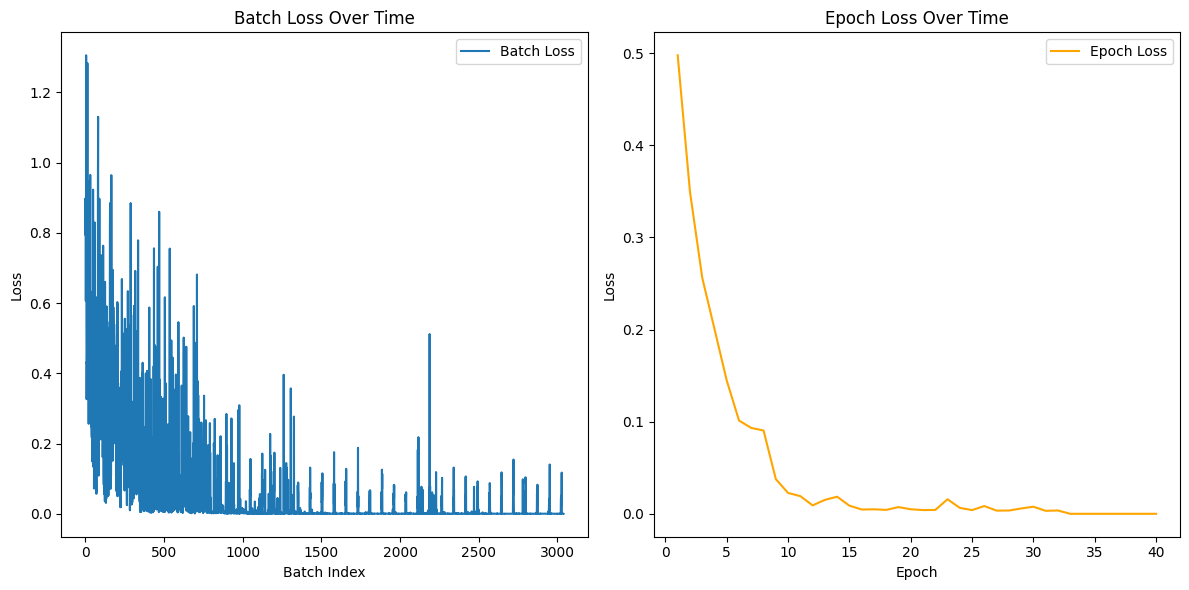

In [ ]:
num_epochs = 40

# Plotting
plt.figure(figsize=(12, 6))

# Plot batch losses
plt.subplot(1, 2, 1)
plt.plot(loss_list, label='Batch Loss')
plt.xlabel('Batch Index')
plt.ylabel('Loss')
plt.title('Batch Loss Over Time')
plt.legend()

# Plot epoch losses
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), epoch_losses, label='Epoch Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss Over Time')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
val_counts, loss_list, metricste = func(findf ,'Price', group_col_name='group', groupwise_batching=True)


Value counts:

Price
 1.0    1140
-1.0     321
 0.0      73
Name: count, dtype: int64



Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Default Model and tokenizer loaded.
Preprocessing data...
Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/40 - Loss: 0.4728


Epoch 2/40 - Loss: 0.3854


Epoch 3/40 - Loss: 0.3004


Epoch 4/40 - Loss: 0.2496


Epoch 5/40 - Loss: 0.1781


Epoch 6/40 - Loss: 0.1635


Epoch 7/40 - Loss: 0.1278


Epoch 8/40 - Loss: 0.1181


Epoch 9/40 - Loss: 0.1078


Epoch 10/40 - Loss: 0.0743


Epoch 11/40 - Loss: 0.0281


Epoch 12/40 - Loss: 0.0446


Epoch 13/40 - Loss: 0.0177


Epoch 14/40 - Loss: 0.0098


Epoch 15/40 - Loss: 0.0180


Epoch 16/40 - Loss: 0.0182


Epoch 17/40 - Loss: 0.0508


Epoch 18/40 - Loss: 0.0221


Epoch 19/40 - Loss: 0.0200


Epoch 20/40 - Loss: 0.0079


Epoch 21/40 - Loss: 0.0149


Epoch 22/40 - Loss: 0.0100


Epoch 23/40 - Loss: 0.0064


Epoch 24/40 - Loss: 0.0060


Epoch 25/40 - Loss: 0.0099


Epoch 26/40 - Loss: 0.0105


Epoch 27/40 - Loss: 0.0050


Epoch 28/40 - Loss: 0.0094


Epoch 29/40 - Loss: 0.0053


Epoch 30/40 - Loss: 0.0044


Epoch 31/40 - Loss: 0.0042


Epoch 32/40 - Loss: 0.0044


Epoch 33/40 - Loss: 0.0040


Epoch 34/40 - Loss: 0.0051


Epoch 35/40 - Loss: 0.0048


Epoch 36/40 - Loss: 0.0043


Epoch 37/40 - Loss: 0.0065


Epoch 38/40 - Loss: 0.0049


Epoch 39/40 - Loss: 0.0041


Epoch 40/40 - Loss: 0.0048

Finished Training...


Starting Testing...

Accuracy: 0.8464
Precision for class -1: 0.6986
Recall for class -1: 0.7286
F1-score for class -1: 0.7133

Precision for class 0: 0.7000
Recall for class 0: 0.3500
F1-score for class 0: 0.4667

Precision for class 1: 0.8956
Recall for class 1: 0.9215
F1-score for class 1: 0.9084

Confusion matrix: 
[[ 51   2  17]
 [  4   7   9]
 [ 18   1 223]]

Saving Model...


Model Saved



In [ ]:
epoch_losses = calculate_epoch_losses(loss_list, len(findf), 16, 40)

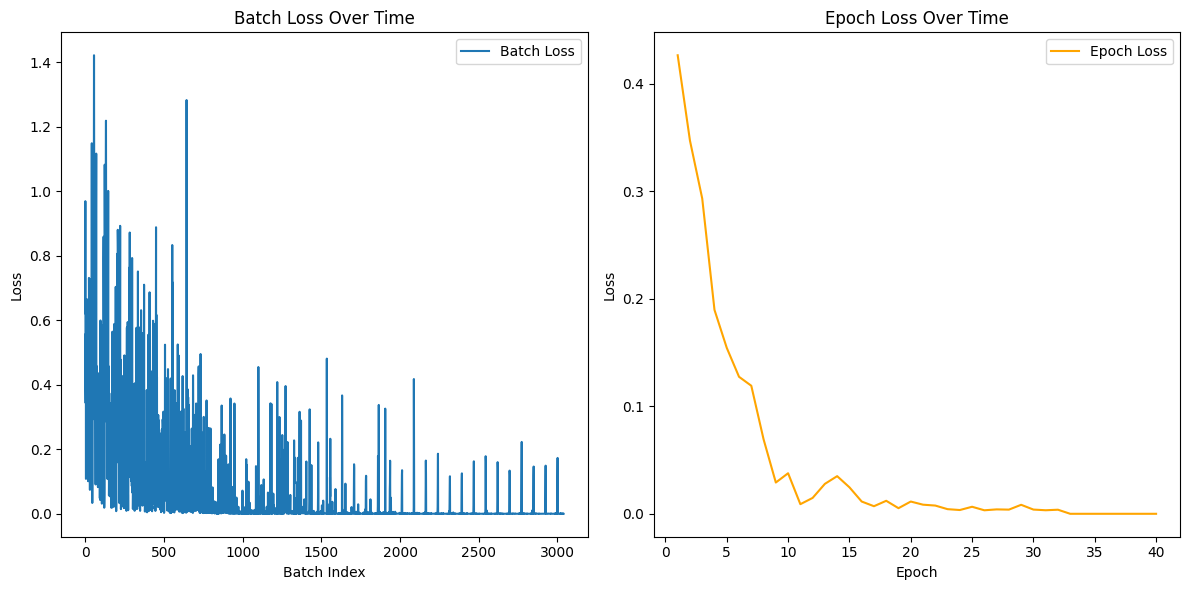

In [ ]:
num_epochs = 40

# Plotting
plt.figure(figsize=(12, 6))

# Plot batch losses
plt.subplot(1, 2, 1)
plt.plot(loss_list, label='Batch Loss')
plt.xlabel('Batch Index')
plt.ylabel('Loss')
plt.title('Batch Loss Over Time')
plt.legend()

# Plot epoch losses
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), epoch_losses, label='Epoch Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss Over Time')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
val_counts, loss_list, metricste = func(findf ,'Price')


Value counts:

Price
 1.0    1140
-1.0     321
 0.0      73
Name: count, dtype: int64



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT 

Default Model and tokenizer loaded.
Preprocessing data...
Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/40 - Loss: 0.4589


Epoch 2/40 - Loss: 0.3642


Epoch 3/40 - Loss: 0.2842


Epoch 4/40 - Loss: 0.2268


Epoch 5/40 - Loss: 0.1960


Epoch 6/40 - Loss: 0.1527


Epoch 7/40 - Loss: 0.0830


Epoch 8/40 - Loss: 0.0642


Epoch 9/40 - Loss: 0.0290


Epoch 10/40 - Loss: 0.0683


Epoch 11/40 - Loss: 0.0575


Epoch 12/40 - Loss: 0.0341


Epoch 13/40 - Loss: 0.0250


Epoch 14/40 - Loss: 0.0147


Epoch 15/40 - Loss: 0.0108


Epoch 16/40 - Loss: 0.0084


Epoch 17/40 - Loss: 0.0569


Epoch 18/40 - Loss: 0.0299


Epoch 19/40 - Loss: 0.0277


Epoch 20/40 - Loss: 0.0350


Epoch 21/40 - Loss: 0.0117


Epoch 22/40 - Loss: 0.0242


Epoch 23/40 - Loss: 0.0095


Epoch 24/40 - Loss: 0.0076


Epoch 25/40 - Loss: 0.0069


Epoch 26/40 - Loss: 0.0122


Epoch 27/40 - Loss: 0.0165


Epoch 28/40 - Loss: 0.0093


Epoch 29/40 - Loss: 0.0064


Epoch 30/40 - Loss: 0.0073


Epoch 31/40 - Loss: 0.0064


Epoch 32/40 - Loss: 0.0064


Epoch 33/40 - Loss: 0.0064


Epoch 34/40 - Loss: 0.0069


Epoch 35/40 - Loss: 0.0059


Epoch 36/40 - Loss: 0.0066


Epoch 37/40 - Loss: 0.0060


Epoch 38/40 - Loss: 0.0051


Epoch 39/40 - Loss: 0.0051


Epoch 40/40 - Loss: 0.0059

Finished Training...


Starting Testing...

Accuracy: 0.8344
Precision for class -1: 0.6774
Recall for class -1: 0.6462
F1-score for class -1: 0.6614

Precision for class 0: 0.6250
Recall for class 0: 0.3333
F1-score for class 0: 0.4348

Precision for class 1: 0.8824
Recall for class 1: 0.9211
F1-score for class 1: 0.9013

Confusion matrix: 
[[ 42   1  22]
 [  4   5   6]
 [ 16   2 210]]

Saving Model...


Model Saved



In [ ]:
epoch_losses = calculate_epoch_losses(loss_list, len(findf), 16, 40)

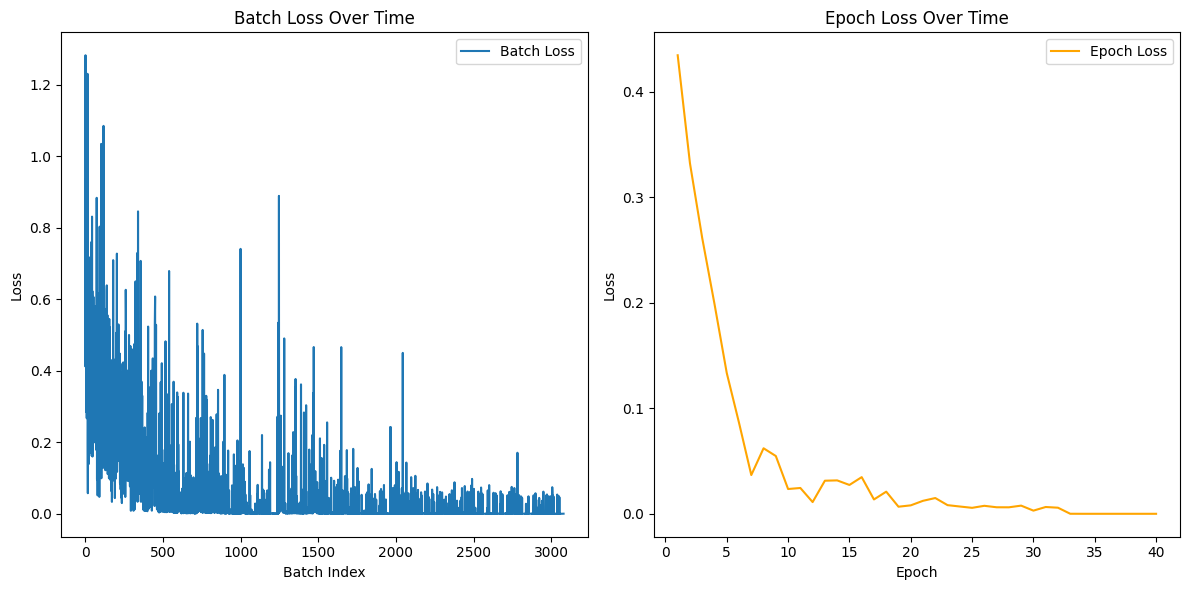

In [ ]:

num_epochs = 40

# Plotting
plt.figure(figsize=(12, 6))

# Plot batch losses
plt.subplot(1, 2, 1)
plt.plot(loss_list, label='Batch Loss')
plt.xlabel('Batch Index')
plt.ylabel('Loss')
plt.title('Batch Loss Over Time')
plt.legend()

# Plot epoch losses
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), epoch_losses, label='Epoch Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss Over Time')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
val_counts, loss_list, metricste = func(df ,'Camera', group_col_name='group')


Value counts:

Camera
-1.0    2313
 1.0    2191
 0.0     126
Name: count, dtype: int64



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Default Model and tokenizer loaded.
Preprocessing data...
Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/40 - Loss: 0.2989


Epoch 2/40 - Loss: 0.2051


Epoch 3/40 - Loss: 0.1264


Epoch 4/40 - Loss: 0.1074


Epoch 5/40 - Loss: 0.1442


Epoch 6/40 - Loss: 0.0721


Epoch 7/40 - Loss: 0.0753


Epoch 8/40 - Loss: 0.0604


Epoch 9/40 - Loss: 0.0345


Epoch 10/40 - Loss: 0.0427


Epoch 11/40 - Loss: 0.0401


Epoch 12/40 - Loss: 0.0237


Epoch 13/40 - Loss: 0.0225


Epoch 14/40 - Loss: 0.0336


Epoch 15/40 - Loss: 0.0282


Epoch 16/40 - Loss: 0.0154


Epoch 17/40 - Loss: 0.0105


Epoch 18/40 - Loss: 0.0166


Epoch 19/40 - Loss: 0.0105


Epoch 20/40 - Loss: 0.0215


Epoch 21/40 - Loss: 0.0157


Epoch 22/40 - Loss: 0.0084


Epoch 23/40 - Loss: 0.0105


Epoch 24/40 - Loss: 0.0094


Epoch 25/40 - Loss: 0.0037


Epoch 26/40 - Loss: 0.0052


Epoch 27/40 - Loss: 0.0055


Epoch 28/40 - Loss: 0.0024


Epoch 29/40 - Loss: 0.0021


Epoch 30/40 - Loss: 0.0014


Epoch 31/40 - Loss: 0.0013


Epoch 32/40 - Loss: 0.0012


Epoch 33/40 - Loss: 0.0009


Epoch 34/40 - Loss: 0.0013


Epoch 35/40 - Loss: 0.0013


Epoch 36/40 - Loss: 0.0009


Epoch 37/40 - Loss: 0.0014


Epoch 38/40 - Loss: 0.0011


Epoch 39/40 - Loss: 0.0010


Epoch 40/40 - Loss: 0.0012

Finished Training...


Starting Testing...

Accuracy: 0.9228
Precision for class -1: 0.9302
Recall for class -1: 0.9186
F1-score for class -1: 0.9244

Precision for class 0: 0.8519
Recall for class 0: 0.8846
F1-score for class 0: 0.8679

Precision for class 1: 0.9192
Recall for class 1: 0.9294
F1-score for class 1: 0.9243

Confusion matrix: 
[[440   3  36]
 [  2  23   1]
 [ 31   1 421]]

Saving Model...


Model Saved



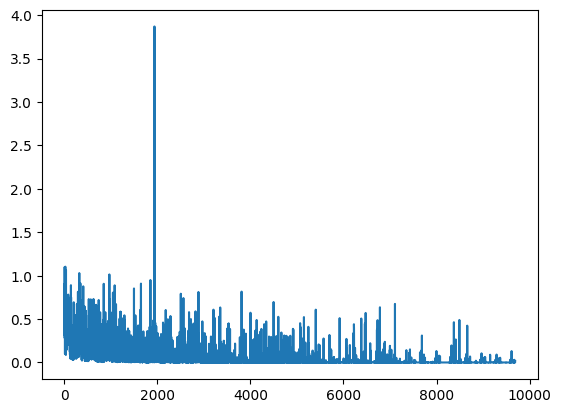

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

## Price

In [ ]:
val_counts, loss_list, metricste = func(seperated_dfs[intents[0]],intents[0] )


Value counts:

Price
 1.0    1084
-1.0     269
 0.0      64
Name: count, dtype: int64



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Default Model and tokenizer loaded.
Preprocessing data...
Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/40:   3%|▎         | 2/71 [00:19<10:43,  9.32s/it, Loss=0.294]

In [ ]:
len(loss_list)

2130

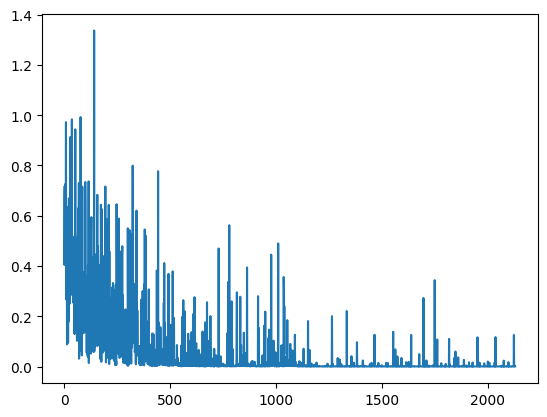

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

## Build and Design

In [ ]:
val_counts, loss_list, metricste = func(seperated_dfs[intents[1]],intents[1] )


Value counts:

 1.0    1546
-1.0     334
 0.0     116
Name: Build and Design, dtype: int64



<ipython-input-9-9e8e5eb600e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=df[column_name].apply(lambda x: x+1)
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (init

Default Model and tokenizer loaded.
Preprocessing data...


/content/drive/MyDrive/Sentiment_Analysis_Roberta/SA_utils/finetune_roberta.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Review Text'] = df['Review Text'].apply(self.preprocess_text)


Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/30 - Loss: 0.3755


Epoch 2/30 - Loss: 0.2698


Epoch 3/30 - Loss: 0.2333


Epoch 4/30 - Loss: 0.1920


Epoch 5/30 - Loss: 0.1176


Epoch 6/30 - Loss: 0.0898


Epoch 7/30 - Loss: 0.0707


Epoch 8/30 - Loss: 0.0267


Epoch 9/30 - Loss: 0.0449


Epoch 10/30 - Loss: 0.0563


Epoch 11/30 - Loss: 0.0126


Epoch 12/30 - Loss: 0.0057


Epoch 13/30 - Loss: 0.0304


Epoch 14/30 - Loss: 0.0294


Epoch 15/30 - Loss: 0.0269


Epoch 16/30 - Loss: 0.0046


Epoch 17/30 - Loss: 0.0133


Epoch 18/30 - Loss: 0.0032


Epoch 19/30 - Loss: 0.0050


Epoch 20/30 - Loss: 0.0051


Epoch 21/30 - Loss: 0.0023


Epoch 22/30 - Loss: 0.0006


Epoch 23/30 - Loss: 0.0127


Epoch 24/30 - Loss: 0.0069


Epoch 25/30 - Loss: 0.0007


Epoch 26/30 - Loss: 0.0010


Epoch 27/30 - Loss: 0.0005


Epoch 28/30 - Loss: 0.0006


Epoch 29/30 - Loss: 0.0004


Epoch 30/30 - Loss: 0.0056

Finished Training...


Starting Testing...

Accuracy: 0.8878
Precision for class 0: 0.7794
Recall for class 0: 0.7910
F1-score for class 0: 0.7852
Precision for class 1: 0.3636
Recall for class 1: 0.1667
F1-score for class 1: 0.2286
Precision for class 2: 0.9286
Recall for class 2: 0.9645
F1-score for class 2: 0.9462

Saving Model...


Model Saved



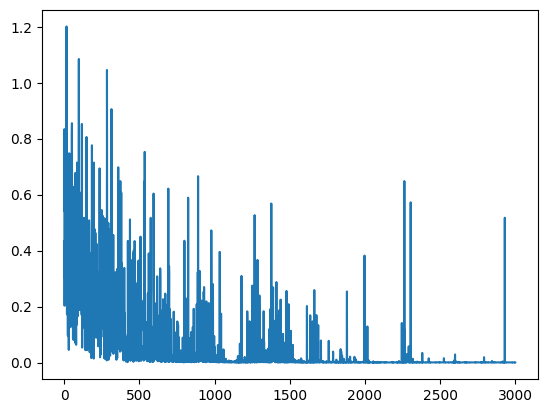

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

## Screen

In [ ]:
val_counts, loss_list, metricste = func(seperated_dfs[intents[2]],intents[2] )


Value counts:

 1.0    1171
-1.0     246
 0.0      30
Name: Screen, dtype: int64



<ipython-input-9-9e8e5eb600e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=df[column_name].apply(lambda x: x+1)
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (init

Default Model and tokenizer loaded.
Preprocessing data...


/content/drive/MyDrive/Sentiment_Analysis_Roberta/SA_utils/finetune_roberta.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Review Text'] = df['Review Text'].apply(self.preprocess_text)


Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/30 - Loss: 0.2697


Epoch 2/30 - Loss: 0.1979


Epoch 3/30 - Loss: 0.1604


Epoch 4/30 - Loss: 0.1140


Epoch 5/30 - Loss: 0.0872


Epoch 6/30 - Loss: 0.0708


Epoch 7/30 - Loss: 0.0417


Epoch 8/30 - Loss: 0.0298


Epoch 9/30 - Loss: 0.0042


Epoch 10/30 - Loss: 0.0058


Epoch 11/30 - Loss: 0.0014


Epoch 12/30 - Loss: 0.0006


Epoch 13/30 - Loss: 0.0004


Epoch 14/30 - Loss: 0.0232


Epoch 15/30 - Loss: 0.0229


Epoch 16/30 - Loss: 0.0076


Epoch 17/30 - Loss: 0.0019


Epoch 18/30 - Loss: 0.0017


Epoch 19/30 - Loss: 0.0004


Epoch 20/30 - Loss: 0.0006


Epoch 21/30 - Loss: 0.0003


Epoch 22/30 - Loss: 0.0003


Epoch 23/30 - Loss: 0.0085


Epoch 24/30 - Loss: 0.0203


Epoch 25/30 - Loss: 0.0067


Epoch 26/30 - Loss: 0.0013


Epoch 27/30 - Loss: 0.0009


Epoch 28/30 - Loss: 0.0007


Epoch 29/30 - Loss: 0.0006


Epoch 30/30 - Loss: 0.0004

Finished Training...


Starting Testing...

Accuracy: 0.9278
Precision for class 0: 0.9024
Recall for class 0: 0.7400
F1-score for class 0: 0.8132
Precision for class 1: 0.5000
Recall for class 1: 0.1667
F1-score for class 1: 0.2500
Precision for class 2: 0.9355
Recall for class 2: 0.9872
F1-score for class 2: 0.9607

Saving Model...


Model Saved



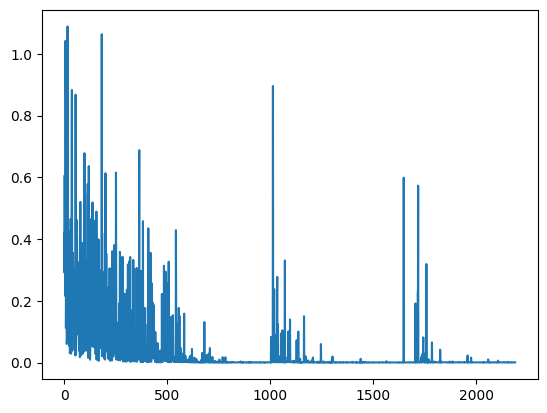

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

## Camera

In [ ]:
## Custom negative example test
fin_cam_data=pd.read_csv(base_intent_path+f"DB_Data/R4T_Custom_neg_Camera_file_5_Jul.csv")
val_counts, loss_list, metricste = func(fin_cam_data , intents[3] )


Value counts:

Camera
 1.0    2862
-1.0    2189
 0.0     109
Name: count, dtype: int64



<ipython-input-14-6fb987676c02>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=df[column_name].apply(lambda x: x+1)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Default Model and tokenizer loaded.
Preprocessing data...
Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/30 - Loss: 0.2006


Epoch 2/30 - Loss: 0.1565


Epoch 3/30 - Loss: 0.1366


Epoch 4/30 - Loss: 0.0992


Epoch 5/30 - Loss: 0.0573


Epoch 6/30 - Loss: 0.0622


Epoch 7/30 - Loss: 0.0393


Epoch 8/30 - Loss: 0.0244


Epoch 9/30 - Loss: 0.0239


Epoch 10/30 - Loss: 0.0254


Epoch 11/30 - Loss: 0.0215


Epoch 12/30 - Loss: 0.0244


Epoch 13/30 - Loss: 0.0128


Epoch 14/30 - Loss: 0.0062


Epoch 15/30 - Loss: 0.0080


Epoch 16/30 - Loss: 0.0043


Epoch 17/30 - Loss: 0.0011


Epoch 18/30 - Loss: 0.0018


Epoch 19/30 - Loss: 0.0009


Epoch 20/30 - Loss: 0.0008


Epoch 21/30 - Loss: 0.0007


Epoch 22/30 - Loss: 0.0007


Epoch 23/30 - Loss: 0.0087


Epoch 24/30 - Loss: 0.0035


Epoch 25/30 - Loss: 0.0006


Epoch 26/30 - Loss: 0.0039


Epoch 27/30 - Loss: 0.0029


Epoch 28/30 - Loss: 0.0007


Epoch 29/30 - Loss: 0.0005


Epoch 30/30 - Loss: 0.0004

Finished Training...


Starting Testing...

Accuracy: 0.9448
Precision for class -1: 0.9720
Recall for class -1: 0.9498
F1-score for class -1: 0.9607
Confusion matrix for class -1:
[416   2  20]

Precision for class 0: 0.3810
Recall for class 0: 0.3636
F1-score for class 0: 0.3721
Confusion matrix for class 0:
[ 2  8 12]

Precision for class 1: 0.9452
Recall for class 1: 0.9634
F1-score for class 1: 0.9542
Confusion matrix for class 1:
[ 10  11 552]


Saving Model...


Model Saved



In [ ]:
val_counts, loss_list, metricste = func(seperated_dfs[intents[3]],intents[3] )


Value counts:

 1.0    2781
-1.0     164
 0.0     103
Name: Camera, dtype: int64



<ipython-input-14-9e8e5eb600e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=df[column_name].apply(lambda x: x+1)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Default Model and tokenizer loaded.
Preprocessing data...


/content/drive/MyDrive/Sentiment_Analysis_Roberta/SA_utils/finetune_roberta.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Review Text'] = df['Review Text'].apply(self.preprocess_text)


Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/30 - Loss: 0.1979


Epoch 2/30 - Loss: 0.1443


Epoch 3/30 - Loss: 0.1081


Epoch 4/30 - Loss: 0.0781


Epoch 5/30 - Loss: 0.0950


Epoch 6/30 - Loss: 0.0592


Epoch 7/30 - Loss: 0.0385


Epoch 8/30 - Loss: 0.0406


Epoch 9/30 - Loss: 0.0216


Epoch 10/30 - Loss: 0.0167


Epoch 11/30 - Loss: 0.0139


Epoch 12/30 - Loss: 0.0167


Epoch 13/30 - Loss: 0.0016


Epoch 14/30 - Loss: 0.0003


Epoch 15/30 - Loss: 0.0033


Epoch 16/30 - Loss: 0.0004


Epoch 17/30 - Loss: 0.0002


Epoch 18/30 - Loss: 0.0002


Epoch 19/30 - Loss: 0.0002


Epoch 20/30 - Loss: 0.0001


Epoch 21/30 - Loss: 0.0001


Epoch 22/30 - Loss: 0.0001


Epoch 23/30 - Loss: 0.0031


Epoch 24/30 - Loss: 0.0003


Epoch 25/30 - Loss: 0.0007


Epoch 26/30 - Loss: 0.0001


Epoch 27/30 - Loss: 0.0001


Epoch 28/30 - Loss: 0.0001


Epoch 29/30 - Loss: 0.0001


Epoch 30/30 - Loss: 0.0002

Finished Training...


Starting Testing...

Accuracy: 0.9427
Precision for class 0: 0.9000
Recall for class 0: 0.8182
F1-score for class 0: 0.8571
Precision for class 1: 0.3000
Recall for class 1: 0.2857
F1-score for class 1: 0.2927
Precision for class 2: 0.9679
Recall for class 2: 0.9749
F1-score for class 2: 0.9714

Saving Model...


Model Saved



In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

## Battery

In [ ]:
val_counts, loss_list, metricste = func(seperated_dfs[intents[4]],intents[4] )


Value counts:

 1.0    1166
-1.0     398
 0.0      64
Name: Battery, dtype: int64



<ipython-input-14-9e8e5eb600e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=df[column_name].apply(lambda x: x+1)
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (ini

Default Model and tokenizer loaded.
Preprocessing data...


/content/drive/MyDrive/Sentiment_Analysis_Roberta/SA_utils/finetune_roberta.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Review Text'] = df['Review Text'].apply(self.preprocess_text)


Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/30 - Loss: 0.3427


Epoch 2/30 - Loss: 0.2367


Epoch 3/30 - Loss: 0.1991


Epoch 4/30 - Loss: 0.1476


Epoch 5/30 - Loss: 0.0970


Epoch 6/30 - Loss: 0.0767


Epoch 7/30 - Loss: 0.0719


Epoch 8/30 - Loss: 0.0398


Epoch 9/30 - Loss: 0.0283


Epoch 10/30 - Loss: 0.0138


Epoch 11/30 - Loss: 0.0293


Epoch 12/30 - Loss: 0.0155


Epoch 13/30 - Loss: 0.0015


Epoch 14/30 - Loss: 0.0008


Epoch 15/30 - Loss: 0.0154


Epoch 16/30 - Loss: 0.0116


Epoch 17/30 - Loss: 0.0184


Epoch 18/30 - Loss: 0.0137


Epoch 19/30 - Loss: 0.0081


Epoch 20/30 - Loss: 0.0051


Epoch 21/30 - Loss: 0.0013


Epoch 22/30 - Loss: 0.0010


Epoch 23/30 - Loss: 0.0007


Epoch 24/30 - Loss: 0.0005


Epoch 25/30 - Loss: 0.0005


Epoch 26/30 - Loss: 0.0004


Epoch 27/30 - Loss: 0.0003


Epoch 28/30 - Loss: 0.0004


Epoch 29/30 - Loss: 0.0003


Epoch 30/30 - Loss: 0.0004

Finished Training...


Starting Testing...

Accuracy: 0.8991
Precision for class 0: 0.8375
Recall for class 0: 0.8375
F1-score for class 0: 0.8375
Precision for class 1: 0.5000
Recall for class 1: 0.3077
F1-score for class 1: 0.3810
Precision for class 2: 0.9331
Recall for class 2: 0.9530
F1-score for class 2: 0.9429

Saving Model...


Model Saved



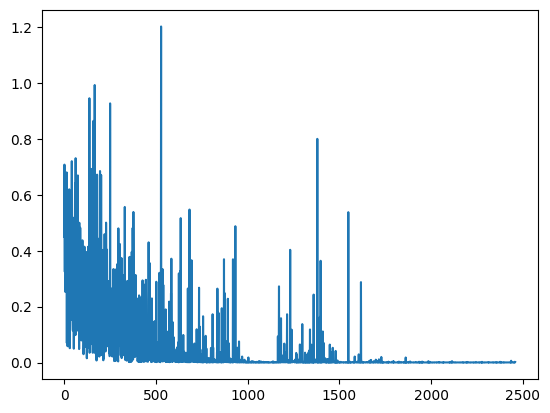

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

## Performance_Processor

In [ ]:
val_counts, loss_list, metricste = func(seperated_dfs[intents[5]],intents[5] )


Value counts:

 1.0    2348
-1.0     289
 0.0     118
Name: Performance_Processor, dtype: int64



<ipython-input-10-677a014624c3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=df[column_name].apply(lambda x: x+1)
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (ini

Default Model and tokenizer loaded.
Preprocessing data...


/content/drive/MyDrive/Sentiment_Analysis_Roberta/SA_utils/finetune_roberta.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Text'] = df['Review Text'].apply(self.preprocess_text)


Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/30 - Loss: 0.3364


Epoch 2/30 - Loss: 0.2361


Epoch 3/30 - Loss: 0.1702


Epoch 4/30 - Loss: 0.1530


Epoch 5/30 - Loss: 0.0807


Epoch 6/30 - Loss: 0.0716


Epoch 7/30 - Loss: 0.0471


Epoch 8/30 - Loss: 0.0423


Epoch 9/30 - Loss: 0.0289


Epoch 10/30 - Loss: 0.0227


Epoch 11/30 - Loss: 0.0166


Epoch 12/30 - Loss: 0.0079


Epoch 13/30 - Loss: 0.0223


Epoch 14/30 - Loss: 0.0235


Epoch 15/30 - Loss: 0.0058


Epoch 16/30 - Loss: 0.0083


Epoch 17/30 - Loss: 0.0086


Epoch 18/30 - Loss: 0.0079


Epoch 19/30 - Loss: 0.0030


Epoch 20/30 - Loss: 0.0041


Epoch 21/30 - Loss: 0.0089


Epoch 22/30 - Loss: 0.0047


Epoch 23/30 - Loss: 0.0019


Epoch 24/30 - Loss: 0.0018


Epoch 25/30 - Loss: 0.0022


Epoch 26/30 - Loss: 0.0036


Epoch 27/30 - Loss: 0.0023


Epoch 28/30 - Loss: 0.0014


Epoch 29/30 - Loss: 0.0018


Epoch 30/30 - Loss: 0.0016

Finished Training...


Starting Testing...

Accuracy: 0.9185
Precision: 0.9120
Recall: 0.9185
F1-score: 0.9149

Saving Model...


Model Saved



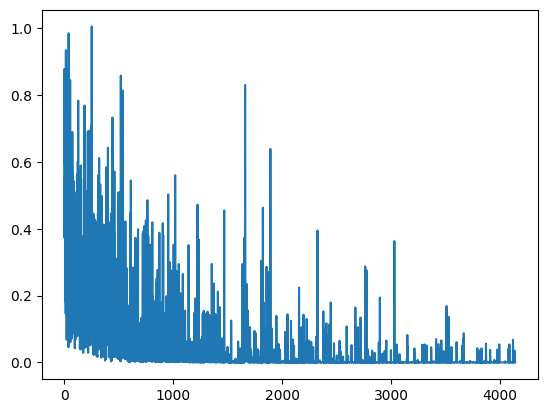

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

## Software

In [ ]:
val_counts, loss_list, metricste = func(seperated_dfs[intents[6]],intents[6] )


Value counts:

 1.0    2342
-1.0     326
 0.0     127
Name: Software, dtype: int64



<ipython-input-9-677a014624c3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=df[column_name].apply(lambda x: x+1)


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Default Model and tokenizer loaded.
Preprocessing data...


/content/drive/MyDrive/Sentiment_Analysis_Roberta/SA_utils/finetune_roberta.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Text'] = df['Review Text'].apply(self.preprocess_text)


Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/30 - Loss: 0.3306


Epoch 2/30 - Loss: 0.2524


Epoch 3/30 - Loss: 0.2090


Epoch 4/30 - Loss: 0.1559


Epoch 5/30 - Loss: 0.0974


Epoch 6/30 - Loss: 0.0866


Epoch 7/30 - Loss: 0.0463


Epoch 8/30 - Loss: 0.0313


Epoch 9/30 - Loss: 0.0855


Epoch 10/30 - Loss: 0.0434


Epoch 11/30 - Loss: 0.0247


Epoch 12/30 - Loss: 0.0252


Epoch 13/30 - Loss: 0.0126


Epoch 14/30 - Loss: 0.0128


Epoch 15/30 - Loss: 0.0135


Epoch 16/30 - Loss: 0.0075


Epoch 17/30 - Loss: 0.0031


Epoch 18/30 - Loss: 0.0018


Epoch 19/30 - Loss: 0.0023


Epoch 20/30 - Loss: 0.0022


Epoch 21/30 - Loss: 0.0020


Epoch 22/30 - Loss: 0.0018


Epoch 23/30 - Loss: 0.0016


Epoch 24/30 - Loss: 0.0014


Epoch 25/30 - Loss: 0.0016


Epoch 26/30 - Loss: 0.0014


Epoch 27/30 - Loss: 0.0017


Epoch 28/30 - Loss: 0.0018


Epoch 29/30 - Loss: 0.0013


Epoch 30/30 - Loss: 0.0018

Finished Training...


Starting Testing...

Accuracy: 0.9269
Precision: 0.9237
Recall: 0.9269
F1-score: 0.9249

Saving Model...


Model Saved



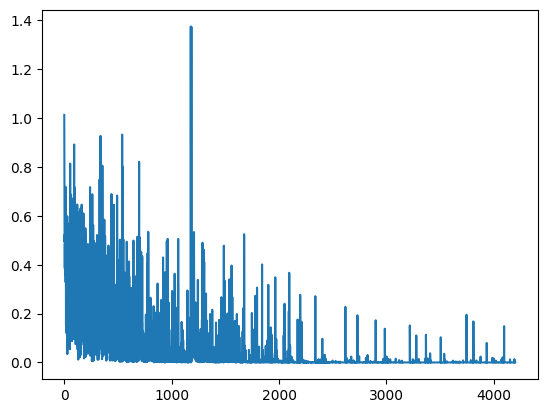

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

## NETWORKING

In [ ]:
val_counts, loss_list, metricste = func(seperated_dfs[intents[7]],intents[7] )


Value counts:

-1.0    114
 1.0    108
 0.0      2
Name: NETWORKING, dtype: int64



<ipython-input-9-9e8e5eb600e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=df[column_name].apply(lambda x: x+1)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Default Model and tokenizer loaded.
Preprocessing data...


/content/drive/MyDrive/Sentiment_Analysis_Roberta/SA_utils/finetune_roberta.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Review Text'] = df['Review Text'].apply(self.preprocess_text)


Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/30 - Loss: 0.3971


Epoch 2/30 - Loss: 0.1818


Epoch 3/30 - Loss: 0.1335


Epoch 4/30 - Loss: 0.0677


Epoch 5/30 - Loss: 0.0380


Epoch 6/30 - Loss: 0.0283


Epoch 7/30 - Loss: 0.0617


Epoch 8/30 - Loss: 0.1774


Epoch 9/30 - Loss: 0.0247


Epoch 10/30 - Loss: 0.1321


Epoch 11/30 - Loss: 0.1104


Epoch 12/30 - Loss: 0.0407


Epoch 13/30 - Loss: 0.0159


Epoch 14/30 - Loss: 0.0097


Epoch 15/30 - Loss: 0.0059


Epoch 16/30 - Loss: 0.0058


Epoch 17/30 - Loss: 0.0038


Epoch 18/30 - Loss: 0.0047


Epoch 19/30 - Loss: 0.0036


Epoch 20/30 - Loss: 0.0043


Epoch 21/30 - Loss: 0.0037


Epoch 22/30 - Loss: 0.0031


Epoch 23/30 - Loss: 0.0030


Epoch 24/30 - Loss: 0.0026


Epoch 25/30 - Loss: 0.0026


Epoch 26/30 - Loss: 0.0020


Epoch 27/30 - Loss: 0.0024


Epoch 28/30 - Loss: 0.0027


Epoch 29/30 - Loss: 0.0024


Epoch 30/30 - Loss: 0.0097

Finished Training...


Starting Testing...



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9348
Precision for class 0: 0.9167
Recall for class 0: 0.9565
F1-score for class 0: 0.9362
Precision for class 1: 0.0000
Recall for class 1: 0.0000
F1-score for class 1: 0.0000
Precision for class 2: 0.9545
Recall for class 2: 0.9545
F1-score for class 2: 0.9545

Saving Model...


Model Saved



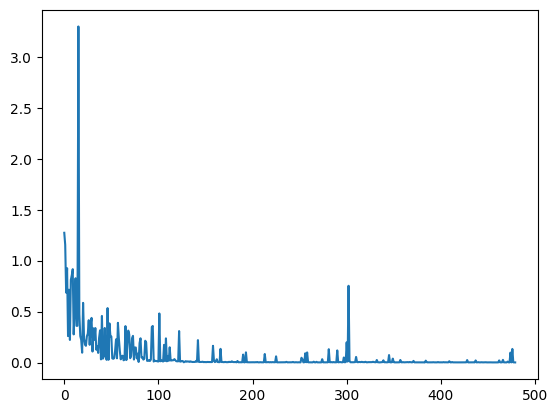

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

## Other_Specs

In [ ]:
val_counts, loss_list, metricste = func(seperated_dfs[intents[8]],intents[8] )


Value counts:

-1.0    265
 1.0    239
 0.0     16
Name: Other_Specs, dtype: int64



<ipython-input-9-9e8e5eb600e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=df[column_name].apply(lambda x: x+1)
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (init

Default Model and tokenizer loaded.
Preprocessing data...
Data preprocessed.
Creating dataloaders...
Dataloaders created.

Starting Training...



Epoch 1/30 - Loss: 0.4844


Epoch 2/30 - Loss: 0.3108


Epoch 3/30 - Loss: 0.2346


Epoch 4/30 - Loss: 0.1955


Epoch 5/30 - Loss: 0.1549


Epoch 6/30 - Loss: 0.1211


Epoch 7/30 - Loss: 0.0564


Epoch 8/30 - Loss: 0.2479


Epoch 9/30 - Loss: 0.0274


Epoch 10/30 - Loss: 0.0203


Epoch 11/30 - Loss: 0.0335


Epoch 12/30 - Loss: 0.0106


Epoch 13/30 - Loss: 0.0084


Epoch 14/30 - Loss: 0.0101


Epoch 15/30 - Loss: 0.0062


Epoch 16/30 - Loss: 0.0212


Epoch 17/30 - Loss: 0.0070


Epoch 18/30 - Loss: 0.0068


Epoch 19/30 - Loss: 0.0078


Epoch 20/30 - Loss: 0.0077


Epoch 21/30 - Loss: 0.0066


Epoch 22/30 - Loss: 0.0048


Epoch 23/30 - Loss: 0.0049


Epoch 24/30 - Loss: 0.0049


Epoch 25/30 - Loss: 0.0047


Epoch 26/30 - Loss: 0.0046


Epoch 27/30 - Loss: 0.0050


Epoch 28/30 - Loss: 0.0040


Epoch 29/30 - Loss: 0.0039


Epoch 30/30 - Loss: 0.0039

Finished Training...


Starting Testing...

Accuracy: 0.8571
Precision for class 0: 0.8197
Recall for class 0: 0.9434
F1-score for class 0: 0.8772
Precision for class 1: 0.0000
Recall for class 1: 0.0000
F1-score for class 1: 0.0000
Precision for class 2: 0.9524
Recall for class 2: 0.8333
F1-score for class 2: 0.8889

Saving Model...


Model Saved



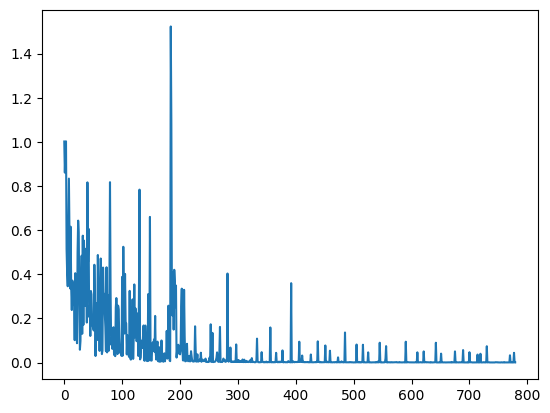

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

# LLama3.1 8B finetuning

## Loading data (Camera orignal + generated via sentence generation code)

In [ ]:
import time
from google.colab import drive
from pathlib import Path
import sys

from main import *
from config import current_possible_intents as intents, MOBILE_MODEL_PTH, MOBILE_TOKENIZER_PTH, Mobile_competitor_dict_pth, Mobile_intent_dict_pth_and_sheet_info
from intent_utils import *
from pro_con_sa import *
from subdomain_analysis_funcs import *
from subdomain_analysis_funcs import *
import torch
import pandas as pd
from subdomain_analysis_funcs import subdomain_splitter
import IPython
from transformers import pipeline, AutoTokenizer, BitsAndBytesconfig, AutoModelForCausalLM
from tqdm import tqdm
import pickle
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from tqdm import tqdm
from numba import cuda
import gc

from unsloth import FastLanguageModel

In [ ]:
from datasets import Dataset, DatasetDict

from config import *

df = pd.read_csv('/content/drive/Shareddrives/sentence_genration/misc/Camera_gen_data_5_Aug_cleaned.csv')
map= {1: 'Positive', -1: 'Negative', 0: 'Neutral'}

df['Camera'] = df['Camera'].map(map)

train_df, test_df = split_dataset(df, 'Camera', 0.8)

dataset = Dataset.from_pandas(train_df)


intent_dict, spw = load_intent_dict(base_intent_path+'Intent_Dictionaries/Mobile_Intent_dict.xlsx')

df = pd.read_excel(base_intent_path+'Mobile_Model_Files/dupli_rem_P7a_20_Feb.xlsx')

new_df=create_final_dataframe(df, intent_dict, spw )
new_df=join_at_stopwords(new_df)

# Final Funcs

## Model Loading

In [ ]:
from unsloth import FastLanguageModel

max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

def load_llama3(model_path = 'unsloth/Meta-Llama-3.1-8B', max_seq_length = 2048, dtype = None, load_in_4bit = True):

  model, tokenizer = FastLanguageModel.from_pretrained(
      model_name = model_path,
      max_seq_length = max_seq_length,
      dtype = dtype,
      load_in_4bit = load_in_4bit,
      # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
  )

  return model, tokenizer
def load_mistral(model_path="unsloth/mistral-7b-v0.3", max_seq_length = 2048, dtype = None, load_in_4bit = True):

  model, tokenizer = FastLanguageModel.from_pretrained(
      model_name = model_path, # Choose ANY! eg teknium/OpenHermes-2.5-Mistral-7B
      max_seq_length = max_seq_length,
      dtype = dtype,
      load_in_4bit = load_in_4bit,
      # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
  )

  return model, tokenizer

## Sentiment Finetuning

In [ ]:
model, tokenizer = load_llama3()
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

==((====))==  Unsloth 2024.8: Fast Llama patching. Transformers = 4.43.3.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.3.1+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.26.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

In [ ]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""
intent='Camera'
EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples, intent):
    instruction = "Analyze the sentiment of the following sentence and classify it as Positive, Negative, or Neutral."
    inputs       = examples["Review Text"]
    outputs      = examples[f"{intent}"]
    texts = []
    for input, output in zip(inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass


tr_dataset = dataset.map(lambda x: formatting_prompts_func(x, intent), batched = True)
for i in tr_dataset:
  print(i)
  print(len(i))
  print(type(i))
  break

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = tr_dataset,
    dataset_text_field = "text",
    # max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 4,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        num_train_epochs = 5, # Set this for 1 full training run.
        # max_steps = 150,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
    ),
)

In [ ]:
trainer_stats = trainer.train()

In [ ]:
model.save_pretrained("/content/drive/Shareddrives/SA/Llama3-unsloth/Camera_lora_model_5_Aug")
tokenizer.save_pretrained("/content/drive/Shareddrives/SA/Llama3-unsloth/Camera_lora_model_5_Aug")

## Inference

In [ ]:
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "/content/drive/Shareddrives/SA/Llama3-unsloth/Camera_lora_model_5_Aug", # YOUR MODEL YOU USED FOR TRAINING
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)
FastLanguageModel.for_inference(model)

In [ ]:
from datasets import Dataset, DatasetDict
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""
intent='Camera'
EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples, intent, EOS_TOKEN):
    instruction = "Analyze the sentiment of the following sentence and classify it as Positive, Negative, or Neutral."
    inputs       = examples["Review Text"]
    outputs      = examples[f"{intent}"]
    texts = []
    for input, output in zip(inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass

test_dataset = Dataset.from_pandas(test_df.drop(columns=['group']))
test_dataset = test_dataset.map(lambda x: formatting_prompts_func(x, intent,EOS_TOKEN), batched = True)
for i in test_dataset:
  print(i)
  print(len(i))
  print(type(i))
  break

In [ ]:
# alpaca_prompt = Copied from above
instruction = "Analyze the sentiment of the following sentence and classify it as Positive, Negative, or Neutral."

FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        instruction, # instruction
        "Camera is bad", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
# _ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)
pred=[]
true=[]
intent='Camera'
for i in test_dataset:
  inputs = tokenizer(
  [
      alpaca_prompt.format(
          instruction, # instruction
          i["Review Text"], # input
          "", # output - leave this blank for generation!
      )
  ], return_tensors = "pt").to("cuda")
  resp = model.generate(**inputs, max_new_tokens = 128)
  resp = tokenizer.batch_decode(resp, skip_special_tokens=True)
  prediction=resp[0].split('### Response:')[1].strip()
#   print('Sentence: ', i['Review Text'])
#   print('Prediction: ', prediction)
#   print('True :', i[f'{intent}'])
#   print()
  pred.append(prediction)
  true.append(i[f'{intent}'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
accuracy = accuracy_score(true, pred)
precision = precision_score(true, pred, average=None)
recall = recall_score(true, pred, average=None)
f1 = f1_score(true, pred, average=None)
confusion = confusion_matrix(true, pred)
print(f"Accuracy: {accuracy:.4f}")
for i in range(len(precision)):
    print(f"Precision for class {i-1}: {precision[i]:.4f}")
    print(f"Recall for class {i-1}: {recall[i]:.4f}")
    print(f"F1-score for class {i-1}: {f1[i]:.4f}")
    print()

print(f"Confusion matrix: \n{confusion}")

Accuracy: 0.9650
Precision for class -1: 0.9521
Recall for class -1: 0.9728
F1-score for class -1: 0.9624

Precision for class 0: 0.9600
Recall for class 0: 0.9231
F1-score for class 0: 0.9412

Precision for class 1: 0.9758
Recall for class 1: 0.9610
F1-score for class 1: 0.9684

Confusion matrix: 
[[358   0  10]
 [  1  24   1]
 [ 17   1 444]]


In [ ]:
# te_batch = DataLoader(test_dataset, batch_size=32)
# FastLanguageModel.for_inference(model) # Enable native 2x faster inference

def SA_fetch_llama3_unsloth(model, tokenizer, dataset, device='cuda'):
  pred=[]
  # true=[]
  instruction = "Analyze the sentiment of the following sentence and classify it as Positive, Negative, or Neutral."

  senti_map = {'Negative':0, 'Neutral':1, 'Positive':2}
  # EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
  for i in dataset:
    inputs = tokenizer(
    [
        alpaca_prompt.format(
            instruction, # instruction
            k, # input
            "", # output - leave this blank for generation!
        ) for k in i['Review Text']
    ], return_tensors = "pt", padding=True).to(device)

    response = model.generate(**inputs, max_new_tokens = 128)
    response = tokenizer.batch_decode(response, skip_special_tokens=True)
    predictions=[resp.split('### Response:')[1].strip() for resp in response]
    print(predictions)
    preds= []
    for k, resp, revtxt in zip(predictions, response, i['Review Text']):
      if k in senti_map:
        preds.append(senti_map[k])
      else:
        print('Error on prediction:')
        print(resp)
        print(k)
        print(revtxt)
        print()
        preds.append(1)
    predictions=preds
    # predictions=[senti_map[k] if k in senti_map else 1 for k in predictions]
    # predictions=[[k] for k in predictions]
    pred.extend(predictions)
    # true.extend(i[f'{intent}'])

  return pred

In [ ]:
SA_fetch_llama3_unsloth(model, tokenizer, te_batch)

## Inference pipeline from main.py

In [ ]:
from intent_utils import *
from finetune_roberta import *
import copy
from transformers import AutoTokenizer, RobertaForSequenceClassification
# from optimum.onnxruntime import ORTModelForSequenceClassification
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification
from pro_con_sa import Pro_Con_Handler
from dataframe_preprocessing import *
# from keywds_analysis import *
# from config import current_possible_intents as Mobile_intents
import zipfile
import os
from competitor_analysis import competitor_analyzer
from datasets import Dataset as dataset_dt

def func(base_path, df_to_use, column_name, Text_column_name='Review Text', onnx_path=None, tokenizer_path=None):
    """
    This func does the SA for the given dataframe of a certain domain/intent, It loads the model and tokenizer,
      readies the dataset and calls the SA_fetch function which gives the setiment for each text or rather the batches of text
    Args:
        base_path (str): Path to the folder containing the models and tokenizers, and Sentiment Utils
        df_to_use (pd.DataFrame): Dataframe to be used for analysis
        column_name (str): Name of the column where the sentiment is to be filled/ Intent column name
        Text_column_name (str, optional): Name of the column where the text is present. Defaults to 'Review Text'.
        onnx_path (str, optional): Path to the onnx model. Defaults to latest working model.
        tokenizer_path (str, optional): Path to the tokenizer. Defaults to latest working model.
    """

    df=df_to_use[[Text_column_name,column_name]]
    if column_name=='Camera':
      model, tokenizer = load_llama3("/content/drive/Shareddrives/SA/Llama3-unsloth/Camera_lora_model_5_Aug")
      EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
      FastLanguageModel.for_inference(model) # Enable native 2x faster inference

      dt = dataset_dt.from_pandas(df)
      dataset = DataLoader(dt, batch_size=32)
      fin_lis = SA_fetch_llama3_unsloth(model, tokenizer, dataset)
      del model
      del tokenizer
      return fin_lis
    else:
      if onnx_path is None:
          # onnx_path=base_path+f"seperated_try_Models/{column_name}/model_20_oct/model-optimized"
          # onnx_path=base_path+f"seperated_try_Models/{column_name}/model_1_Nov-optimized"
          # onnx_path=f'/content/drive/Shareddrives/SA/{column_name}/Model_DeBERTa_V3_14_Dec'
          onnx_path=f'/content/drive/Shareddrives/SA/{column_name}/Model_DeBERTa_V3_7_Jan'
      else:
          if bool(re.search(r'\{\}', onnx_path)):
              onnx_path=onnx_path.format(column_name)
          else:
              onnx_path=onnx_path


      # model=ORTModelForSequenceClassification.from_pretrained(onnx_path, file_name="model_optimized.onnx", use_io_binding=True)
      if 'DeBERTa' in onnx_path:
          model=DebertaV2ForSequenceClassification.from_pretrained(onnx_path)
      else:
          # model=ORTModelForSequenceClassification.from_pretrained(onnx_path, file_name="model_optimized.onnx", use_io_binding=True)
          model=RobertaForSequenceClassification.from_pretrained(onnx_path)

      if tokenizer_path is None:
          # tokenizer_path=base_path+f'seperated_try_Models/{column_name}/tokenizer_20_oct'
          # tokenizer_path=f'/content/drive/Shareddrives/SA/{column_name}/scratch_tokenizer_31_oct'
          tokenizer_path = f'/content/drive/Shareddrives/SA/{column_name}/Tokenizer_V3_DeBERTa_7_Jan'
      else:
          if bool(re.search(r'\{\}', tokenizer_path)):
              tokenizer_path=tokenizer_path.format(column_name)
          else:
              tokenizer_path=tokenizer_path

      # tokenizer = AutoTokenizer.from_pretrained(base_path+f'seperated_try_Models/{column_name}/tokenizer_20_oct')
      # tokenizer = AutoTokenizer.from_pretrained(f'/content/drive/Shareddrives/SA/{column_name}/scratch_tokenizer_31_oct')
      if 'DeBERTa' in tokenizer_path:
          tokenizer = DebertaV2Tokenizer.from_pretrained(tokenizer_path)
      else:
          tokenizer = RobertaTokenizer.from_pretrained(tokenizer_path, is_split_into_words=True)

      device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
      df.loc[:,'Review Text'] = df['Review Text'].apply(preprocess_text)

      dataset = SentimentDataset(df, tokenizer, Text_column_name, column_name)
      changed_order = dataset.changed_order
      dataloader = DataLoader(dataset, batch_size=128, collate_fn=lambda batch: dynamic_collate_fn(batch, tokenizer))
      model.to(device)
      lis=SA_fetch(model, dataloader, device)
      # Create a mapping from the given indices to the natural order
      index_mapping = {index: i for i, index in enumerate(changed_order)}
      fin_lis = [None] * len(lis)
      for original_index, new_index in index_mapping.items():
          fin_lis[original_index] = lis[new_index]

      del model
      return fin_lis



def supply_df(base_path, base_intent_path, og_df, intents, msgs=True, dev_msgs=False, onnx_path=None, tokenizer_path=None, Intent_dict_path_and_sheet_info=['Intent_Dictionaries/Mobile_Intent_dict.xlsx', 'MOBILE', 'Special_words_Mobile'], Competitor_path='Intent_Dictionaries/Compare_dict.xlsx'):
    """
    This function is used to supply the dataframe to the SA module.
    It loads the intent dictionary and stopwords and then calls the competitor_analyzer function.
    It then calls the Pro_Con_Handler function if there are any pros and cons present.
    It then calls the create_final_dataframe function to create the final dataframe.
    It then calls the join_at_stopwords function to join the sentences at stopwords.
    then does the SA for each domain/intent and fills the sentiment.
    Finally it merges all output dataframes and returns the final dataframe.
    Args:
        base_path (str): Path to the folder containing the models and tokenizers, and Sentiment Utils
        base_intent_path (str): Path to the folder containing the intent dictionaries and stopwords
        og_df (pd.DataFrame): Original dataframe supplied by the user
        msgs (bool, optional): Whether to print messages or not. Defaults to True. like what is ongoing
        dev_msgs (bool, optional): Whether to print development messages or not. Defaults to False. like any errors or warnings
        onnx_path (str, optional): Path to the onnx model. Defaults to None i.e. latest working model.
        tokenizer_path (str, optional): Path to the tokenizer. Defaults to None i.e. latest working model.
        Intent_dict_path (str, optional): Path to the intent dictionary from Intent_analysis folder. Defaults to 'Intent_Dictionaries/Mobile_Intent_dict.xlsx'.
        Competitor_path (str, optional): Path to the competitor dictionary from Intent_analysis folder. Defaults to 'Intent_Dictionaries/Compare_dict.xlsx'.
        intents (list, optional): List of intents for which SA is possible rn. Defaults to intents of Mobile.
    Returns:
        pd.DataFrame: Final dataframe with sentiment filled
    """

    df=copy.deepcopy(og_df)
    intent_dict, spw = load_intent_dict(base_intent_path+Intent_dict_path_and_sheet_info[0], Intent_dict_path_and_sheet_info[1], Intent_dict_path_and_sheet_info[2])

    #Preprocessing
    df = process_df(df)

    df, final_comp_df, remaining_df, our_model_temp, parent_comp_temp = competitor_analyzer(base_path, base_intent_path, df, intent_dict, spw, func, onnx_path, tokenizer_path, Competitor_path=Competitor_path, intents=intents, msgs=msgs,dev_msgs=dev_msgs)

    #Pros and Cons
    if msgs:
        print('Seperating Pros and Cons...')
    pattern1 = r'\bpros\b\s?:|\bCons\b\s?:'
    pattern2 = r'\'\s?.\s?\''
    cond=df['Review Text'].str.contains(pattern1, case=False, regex=True) & df['Review Text'].str.contains(pattern2, case=False, regex=True)

    #Seperate Pros and Cons and remove from main df
    pros_cons = df[cond]
    df = df[~cond]
    if not pros_cons.empty:
        #Handling Pros and Cons
        if msgs:
            print('Handling Pros and Cons...')

        procondf=Pro_Con_Handler(base_path, pros_cons, intent_dict, spw, func, intents, msgs, onnx_path, tokenizer_path)
    else:
        procondf=None
        if msgs:
            print('Warning: No Pros and Cons found', end='\n\n')
    if msgs:
        print('Going on with regular reviews...')
        print('Splitting sentences and assigning intent...')

    watch_dict2={}
    for i in intent_dict:
        k=[]
        temp=[]
        intent_dict[i].sort()
        for item in intent_dict[i]:
            # if item[:3]==r'^(?' or item[:3]==r'(?:':
            if (r'^(?' in item) or (item[:3]==r'(?:'):

                temp.append(item)
            else:
                k.append(item)
        temp.append(r'\b|\b'.join(k))
        watch_dict2[i]=temp

    final_df = create_final_dataframe(df, watch_dict2, spw)
    if msgs:
        print('Joining at stopwords(except: sentiment reversers like however, but, although etc.)...')

    final_df = join_at_stopwords(final_df)

    if msgs:
        print('done')
    # if choice in [1,3]:
    #     print('Keyword Analysis...')
    #     key_fin_dfs=keyword_analyzer(base_path, final_df, intent_dict, spw, intents, func)
    # if choice in [2,3]:
        # print('Sentiment Analysis...')
    if msgs:
        print('Seperating by domain/intent...')
    seperated_dfs=merge_like_sentences_without_senti(final_df, intents)

    if msgs:
        print('Seperating by domain/intent done')

    print('Filling sentiment...')
    ##Sentiment Filling

    # dummy numbers
    for i in intents:
        # seperated_dfs[i]=pd.read_excel(f"{i}_file.xlsx")
        seperated_dfs[i][i]=0

    for i in intents:
        if msgs:
            print(f'filling sentiment for {i}...')

        if seperated_dfs[i].empty:
            if msgs:
                print('Empty df for ', i)
            continue
        seperated_dfs[i].loc[:, i]=func(base_path,df_to_use = seperated_dfs[i], column_name = i , onnx_path = onnx_path, tokenizer_path = tokenizer_path)
        if msgs:
            print('done')
    for i in intents:
        if seperated_dfs[i].empty:
            continue
        seperated_dfs[i][i]=seperated_dfs[i][i].apply(lambda x: x-1)
    if msgs:
        print('All Filling sentiment done')

    overall_df = pd.concat(seperated_dfs.values(), axis=0)
    if overall_df.empty:
        if msgs:
            print('No significant sentiment found')
        return

    overall_df.sort_values('UID', inplace=True)
    overall_df.drop('Review Text', axis=1, inplace=True)
    merged_df = overall_df.groupby('UID').agg(lambda x: x.dropna().iloc[0] if x.notna().any() else np.nan).reset_index()

    if procondf is None:
        combined_df = merged_df
    else:
        combined_df = pd.concat([merged_df, procondf], axis=0).sort_values('UID').reset_index(drop=True)

    columns_to_keep=['Name', 'UID', 'Model Name', 'Model Number', 'Country', 'Brand', 'Source', 'Rating', 'Review Date', "Seeded Review", 'Review Title', 'Review Text', 'Native_Review_Title', 'Native_Review_Text']

    columns_present=og_df.columns.to_list()
    columns_to_drop=list(set(columns_present)-set(columns_to_keep))
    df2=og_df.drop(columns_to_drop, axis=1)

    # column_to_drop_after = 'Review Text'
    # column_index = og_df.columns.get_loc(column_to_drop_after) + 1

    # df2 = og_df.iloc[:, :column_index]

    # resdf = pd.concat([df2.set_index('UID'), combined_df.set_index('UID')], axis=1).reset_index()
    resdf = pd.merge(df2, combined_df, how='left', on='UID')

    # resdf = pd.concat([resdf.set_index('UID'), final_comp_df.set_index('UID')], axis=1).sort_values('UID').reset_index()
    resdf = pd.merge(resdf, final_comp_df, how='left', on='UID')


    ###If intent is null in resdf but present in temp_model_combined_df then fill it
    if isinstance(our_model_temp, pd.DataFrame):
        for i in intents:
            if i in our_model_temp.columns:
                cond=resdf.UID.isin(our_model_temp[our_model_temp[i].notna()].UID.to_list())
            else:
                continue
            if pd.isnull(resdf.loc[cond, i]).any():
                #Fill the null values with the values from temp_model_combined_df
                cond2=resdf.loc[cond, i].isnull()
                final_cond=cond & cond2
                resdf.loc[final_cond, i]=our_model_temp.loc[our_model_temp.UID.isin(resdf[final_cond].UID.to_list()), i].values

    ###If intent is null in resdf but present in parent_comp_temp then fill it
    if isinstance(parent_comp_temp, pd.DataFrame):
        for i in intents:
            if i in parent_comp_temp.columns:
                cond=resdf.UID.isin(parent_comp_temp[parent_comp_temp[i].notna()].UID.to_list())
            else:
                continue
            if pd.isnull(resdf.loc[cond, i]).any():
                #Fill the null values with the values from parent_comp_temp
                cond2=resdf.loc[cond, i].isnull()
                final_cond=cond & cond2
                resdf.loc[final_cond, i]=parent_comp_temp.loc[parent_comp_temp.UID.isin(resdf[final_cond].UID.to_list()), i].values


    return resdf, remaining_df
    # return {'sentiment':resdf, 'keyword':key_fin_dfs}


In [ ]:
from config import current_possible_intents, MOBILE_MODEL_PTH, MOBILE_TOKENIZER_PTH, Mobile_competitor_dict_pth, Mobile_intent_dict_pth_and_sheet_info

resdf, remaining_df=supply_df(base_path, base_intent_path, df, onnx_path = MOBILE_MODEL_PTH, tokenizer_path = MOBILE_TOKENIZER_PTH, Intent_dict_path_and_sheet_info=Mobile_intent_dict_pth_and_sheet_info, Competitor_path = Mobile_competitor_dict_pth, intents=current_possible_intents , msgs=True)


In [ ]:
resdf

,UID,Name,Model Name,Model Number,Country,Brand,Seeded Review,Source,Rating,Review Date,...,Price,Build and Design,Screen,Camera,Battery,Performance_Processor,Software,NETWORKING,Other_Specs,Competitor_SA
0,1,NaN,Pixel 7a,NaN,USA,Google,0,T-mobile,5,2023-06-14,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,2,NaN,Pixel 7a,NaN,USA,Google,0,T-mobile,5,2023-05-18,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,Pixel 7a,NaN,USA,Google,0,T-mobile,5,2023-05-21,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,4,NaN,Pixel 7a,NaN,USA,Google,1,T-mobile,5,2023-07-05,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
4,5,NaN,Pixel 7a,NaN,USA,Google,1,T-mobile,5,2023-07-07,...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1378,NaN,Pixel 7a,NaN,Australia,Google,0,Harvey Norman,5,2023-06-16,...,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
1118,1379,NaN,Pixel 7a,NaN,Australia,Google,0,Harvey Norman,5,2023-07-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119,1380,NaN,Pixel 7a,NaN,Australia,Google,0,Harvey Norman,4,2023-06-15,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
1120,1381,NaN,Pixel 7a,NaN,Australia,Google,0,Harvey Norman,5,2023-06-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in intents:
  print(resdf[i].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64


In [ ]:
resdf.to_excel(base_intent_path+'Outputs/p7a_cam_llama.xlsx', index=False)

In [ ]:
# @title Define data entry dfs and model names
from intent_utils import *
from config import current_possible_intents as intents
from datetime import datetime

path_from_intent_analysis_folder_for_de_df='Mobile_Model_Files/dupli_rem_P7a_20_Feb.xlsx' # @param {type:"string"}
path= base_intent_path + path_from_intent_analysis_folder_for_de_df
# de_df=pd.read_excel(path)
de_df= pd.read_excel(path)  ##R4T: ready for training


current_date = datetime.now()
day = str(current_date.day)
short_month_name = current_date.strftime("%b")

# if not custom_path:
#     cur_path=base_intent_path+f'Outputs/ME_db_test_{model_name}_{day}_{short_month_name}.xlsx'
# else:
#     cur_path=custom_path

me_df=resdf


check_against_df(base_intent_path, me_df, de_df, intents)

Checking if there is any weird sentiment values in the Human evaluated dataframe
Checking if there is any weird sentiment values in the machine evaluated dataframe
Accuracy of the dataframe(Overall Sentiment + Intent): 
Accuracy for Price: 96.26%
Accuracy for Build and Design: 93.05%
Accuracy for Screen: 96.43%
Accuracy for Camera: 94.30%
Accuracy for Battery: 95.28%
Accuracy for Performance_Processor: 93.76%
Accuracy for Software: 94.74%
Accuracy for NETWORKING: 99.38%
Accuracy for Other_Specs: 98.93%
wish to store mismatched rows? (y/n)
n
Want to check the accuracy of the Intents only? (y/n)
y
Checking the accuracy of the Intents only...
Accuracy of the dataframe(Intents only): 
--------------------------------------------------------------
| Accuracy of Price: 98.22%  |
|Accuracy Score for 1 only:0.97%
|Accuracy Score for 0 only:0.99%
--------------------------------------------------------------
|Precision:98.22%
|Precision for Intents only(1): 97.46%
|Recall:98.22%
|Recall for Int

In [ ]:
resdf
